In [28]:
import pandas as pd
import os

In [29]:
os.chdir('..')

In [30]:
from subprocess import check_output
df = pd.read_excel('C:\pyDbs\clean-data3.xlsx')

In [31]:
df.head()

,text
0,wanudeen myjoe tulis sesak takkan nak tunggu s...
1,inizali bismillaah umumkan positif covid baxk ...
2,dr tompi bener herbal bs membantu mengobati co...
3,kkmputrajaya penyakit berjangkit ncd malaysia ...
4,repubblica praticamente non esiste lhiv la mal...


In [32]:
#mengahapus tanda baca
import re
df['paper_text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [33]:
#merubah ke lowercase
df['paper_text_processed'] = df['paper_text_processed'].map(lambda x: x.lower())

In [34]:
df['paper_text_processed'].head()

0    wanudeen myjoe tulis sesak takkan nak tunggu s...
1    inizali bismillaah umumkan positif covid baxk ...
2    dr tompi bener herbal bs membantu mengobati co...
3    kkmputrajaya penyakit berjangkit ncd malaysia ...
4    repubblica praticamente non esiste lhiv la mal...
Name: paper_text_processed, dtype: object

In [35]:
#exploratory analysis
# Import the wordcloud library
from wordcloud import WordCloud

In [36]:
# Join the different processed titles together.
long_string = ','.join(list(df['paper_text_processed'].values))

In [37]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [38]:
# Generate a word cloud
wordcloud.generate(long_string)

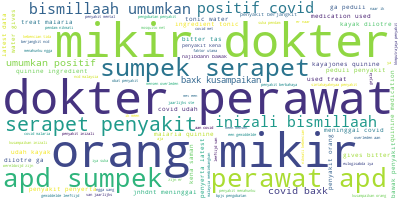

In [39]:
# Visualize the word cloud
wordcloud.to_image()

In [40]:
#4. Prepare text for LDA Analysis
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [42]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [43]:
# Initialise the count vectorizer with the Indonesia stop words
#count_vectorizer = CountVectorizer(stop_words='indonesia')
from nltk.corpus import stopwords
count_vectorizer = CountVectorizer(stop_words=set(stopwords.words('indonesian')))
#count_vectorizer = CountVectorizer(stop_words=set(stopwords.words('english')))

In [44]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['paper_text_processed'])

C:\Users\DzikyR\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


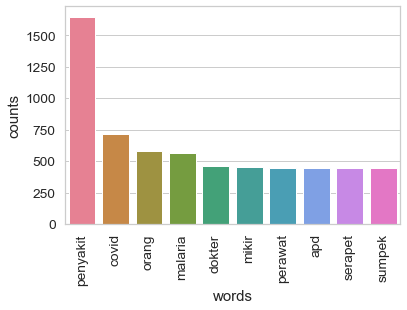

In [45]:
plot_10_most_common_words(count_data, count_vectorizer)

In [46]:
#5. LDA MODEL TRAINING DAN VISUALISASI
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [47]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [48]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [49]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

In [50]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [51]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
orang penyakit dokter mikir perawat apd sumpek serapet quinine malaria

Topic #1:
penyakit anak malaria mosquito utama faktor net malaysia hipertensi ncd

Topic #2:
penyakit allah gejala obat hati ga tu gue nih sakit

Topic #3:
covid positif inizali baxk kusampaikan umumkan bismillaah malaria penyakit cerita

Topic #4:
penyakit covid malaria udah kena ga kayak latest meninggal data
